# Regression - With Solutions

Import the packages and modules that will be used throughout:

In [1]:
from sklearn.model_selection import train_test_split  # To split up the dataset
from sklearn.preprocessing import StandardScaler      # To normalise the datasets
from sklearn import linear_model  # For the linear and SGD models
from sklearn import ensemble      # For the Extra Tree Recessor
from sklearn import metrics       # For the R^2 scores
from matplotlib import pyplot as plt
import numpy as np

## Saratoga House Prices

The SaratogaHouses dataset contains the prices of houses in the Saratogo area, along with different features. This dataset is not part of the datasets that come with scikit-learn and can be found in the "data" directory as a Comma-separated values format (cvs).

Python code is provided below that reads in the dataset from the csv format and outputs it into four variables, the first two are the feaure_names and target_name and the second two are 'saratoga_X' and 'saratoga_y'.

feature_names contains the names of the different features in the order they appear in the dataset. target_name contains the name of the target. saratoga_X contains the values for the features and saratoga_y contains the target values. In total there are six features and 1063 instances.

In [2]:
import csv
with open('./data/SaratogaHouses.csv', 'rt') as csvfile:
    saratoga_reader = csv.reader(csvfile, delimiter=',', quotechar='"')
    
    # The first rwo contains the feature names
    row = next(saratoga_reader)
    feature_names = np.array(row[1:])
    target_name = np.array(row[0])
   
    # The rest of the file contains the target values in the first
    # column and the feature values in the others
    saratoga_X, saratoga_y = [], []
    for row in saratoga_reader:
        saratoga_X.append(row[1:])
        saratoga_y.append(row[0])
   
    saratoga_X = np.array(saratoga_X)
    saratoga_y = np.array(saratoga_y)

print("Feature Names: {}, Target Name: {}".format(feature_names, target_name))
print("Shape of the dataset: {}".format(np.shape(saratoga_X)))

Feature Names: ['Living.Area' 'Baths' 'Bedrooms' 'Fireplace' 'Acres' 'Age'], Target Name: Price
Shape of the dataset: (1063, 6)


### Preprocessing

Looking at the head of the saratoga dataset, it can be seen that there is one feature, Fireplace, that is a string which takes the the value of "N" or "Y". As there are only two possible values it can take it can be transformed into a binary value of either 0 or 1.

It can also be seen that the data types in the dataset are not all the same, so it is also needed to convert them all to the same type. Below they are converted to type np.float64.

In [3]:
print("Feature Values:")
print(saratoga_X[0:3,:])
print("Target Values:")
print(saratoga_y[0:3])

Feature Values:
[['1982' '1' '3' 'N' '2' '133']
 ['1676' '1.5' '3' 'Y' '0.38' '14']
 ['1694' '2' '3' 'Y' '0.96' '15']]
Target Values:
['142212' '134865' '118007']


In [4]:
saratoga_X[saratoga_X == "N"] = 0
saratoga_X[saratoga_X == "Y"] = 1
saratoga_X = saratoga_X.astype(np.float64)
saratoga_y = saratoga_y.astype(np.float64)

print("Feature Values:")
print(saratoga_X[0:3,:])

Feature Values:
[[  1.98200000e+03   1.00000000e+00   3.00000000e+00   0.00000000e+00
    2.00000000e+00   1.33000000e+02]
 [  1.67600000e+03   1.50000000e+00   3.00000000e+00   1.00000000e+00
    3.80000000e-01   1.40000000e+01]
 [  1.69400000e+03   2.00000000e+00   3.00000000e+00   1.00000000e+00
    9.60000000e-01   1.50000000e+01]]


Now we want to split our data into a training set and a testing set so that we can measure the accuracy of the different models later on.

In [5]:
saratoga_X_train, saratoga_X_test, saratoga_y_train, saratoga_y_test = train_test_split(saratoga_X, saratoga_y,
                                                                        test_size=0.25, random_state=0)

Next we normalise both sets.

In [6]:
def normalise(X, y):
    standard_scaler = StandardScaler()
    return standard_scaler.fit_transform(X), standard_scaler.fit_transform(y.reshape(-1, 1))

X_train, y_train = normalise(saratoga_X_train, saratoga_y_train)
X_test, y_test = normalise(saratoga_X_test, saratoga_y_test)

### Plotting Different Features against the Target

To get an idea of the behaviour of different features we can plot them against the taget.

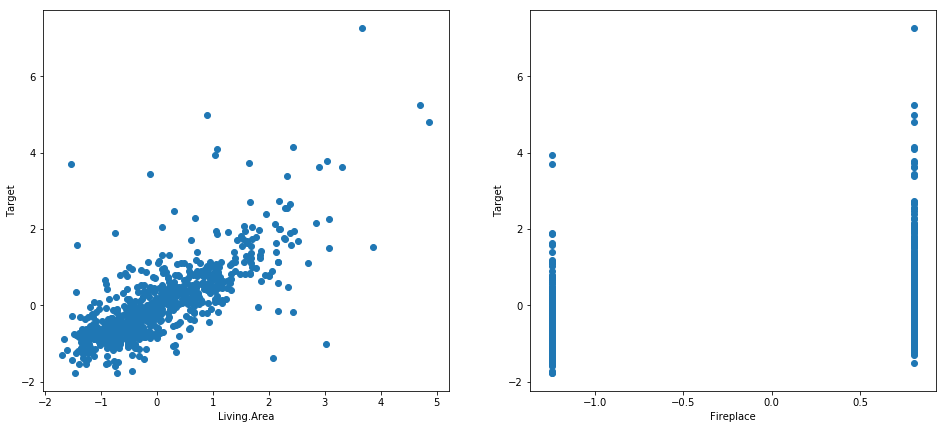

In [7]:
fig, ((ax1), (ax2)) = plt.subplots(1, 2)
ax1.scatter(X_train[:, 0], y_train)
ax1.set_xlabel("{}".format(feature_names[0]))
ax1.set_ylabel("Target")
ax2.scatter(X_train[:, 3], y_train)
ax2.set_xlabel("{}".format(feature_names[3]))
ax2.set_ylabel("Target")
fig.set_figheight(7)
fig.set_figwidth(16)
plt.show()

It looks like there is a linear relationship between the Living Area and the target. For the Fireplace it's harder to make out a distinct trend, though it would be difficult to as it can only take two values.

### A simple Linear Regression Model for an Individual Feature

To make a simple linear regression model for the average number of rooms against the target we firstly initialise a LinearRegression instance and then fit the feature data and target to it:

In [8]:
regr_lin = linear_model.LinearRegression()
regr_lin.fit(X_train[:, 0].reshape(-1, 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The data for the average number of rooms is found in the 6th row and needs to be reshaped to make it a shape that the fit function in LinearRegression expects (1D arrays aren't allowed but as we're slicing the dataset that's what we would be trying to pass in if we didn't reshape it).

Now we want to plot our orginal graph with the regression line to see how it looks. To do this we predict the target value over the range of the Living Area using the predict function found in our regression model and then plot that on top of our original graph:

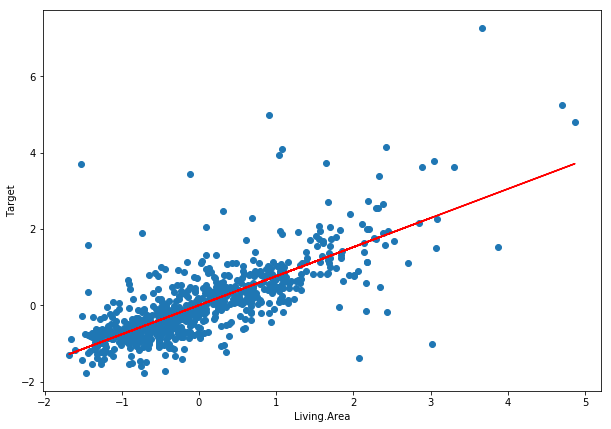

In [9]:
target_prediction = regr_lin.predict(X_train[:, 0].reshape(-1, 1))

fig, (ax1) = plt.subplots(1, 1)

ax1.scatter(X_train[:, 0], y_train)
ax1.plot(X_train[:, 0], target_prediction, color='red')
ax1.set_xlabel("{}".format(feature_names[0]))
ax1.set_ylabel("Target")

fig.set_figheight(7)
fig.set_figwidth(10)
plt.show()

This regression model seems to fit our data fairly well, though calculating the R-squared value would give a better idea of this.

In [10]:
print("R-sqaured value for training set:",regr_lin.score(X_train[:, 0].reshape(-1, 1), y_train))
print("R-sqaured value for testing set:",regr_lin.score(X_test[:, 0].reshape(-1, 1), y_test))

R-sqaured value for training set: 0.581057512278
R-sqaured value for testing set: 0.641971232833


### A Linear Model Including all Features using SGD

SGD is a linear model that tries to minimise the squared loss, as with LinearModel it can be found in the linear_model module.

Below a function 'train_and_evaluate' is defined that takes in the regression mode, the training feature values, and the training target values and fits the inputted model to the data while printing the R-squared value. The SGD model is then passed in and fitted to the training data.

In [11]:
def train_and_evaluate(regr, X_train, y_train):
    regr.fit(X_train, y_train.reshape(-1, ))
    print("R-sqaured value for training set:",regr.score(X_train, y_train.reshape(-1, )))

In [12]:
regr_sgd = linear_model.SGDRegressor(loss='squared_loss', random_state=0)
train_and_evaluate(regr_sgd, X_train, y_train)

R-sqaured value for training set: 0.59958364459


The coefficents for each feature (the $\beta$ coefficients mentioned in the presentation) can be displayed, along with each feature name. The the R-squared value of the model can also be calculated for testing dataset, which is done below through defining a function for it.

In [13]:
for i in range(6):
    print("{}: {}".format(feature_names[i], regr_sgd.coef_[i]))

Living.Area: 0.5979196167992555
Baths: 0.20940887520700457
Bedrooms: -0.02662962622171055
Fireplace: 0.04568902164469717
Acres: 0.0044803035265567155
Age: -0.04458307780838911


In [14]:
def calculate_R2(X, y, regr):
    y_pred = regr.predict(X)
    print("R-sqaured value: {0:.3f}".format(metrics.r2_score(y, y_pred)),"\n")

calculate_R2(X_test, y_test, regr_sgd)

R-sqaured value: 0.678 



### An Extra Trees Model

Now we make an Extra Tree regressor model with 100, fit it to the training data and observe the R-squared value for the training set.

In [15]:
regr_et=ensemble.ExtraTreesRegressor(n_estimators=100, random_state=0)
train_and_evaluate(regr_et, X_train, y_train)

R-sqaured value for training set: 0.999641382406


An function can be defined that prints the feature importances in order of their values and also plots them on a bar chart, along with their standard deviations, to give a visualisation of their values and associated errors. The R-squared value on the testing data can also be calculated to show how well the model fits are testing set.

Feature ranking:
1. Living.Area (feature 0), Importance: 0.486248
2. Baths (feature 1), Importance: 0.183927
3. Age (feature 5), Importance: 0.113215
4. Acres (feature 4), Importance: 0.090435
5. Fireplace (feature 3), Importance: 0.065468
6. Bedrooms (feature 2), Importance: 0.060706


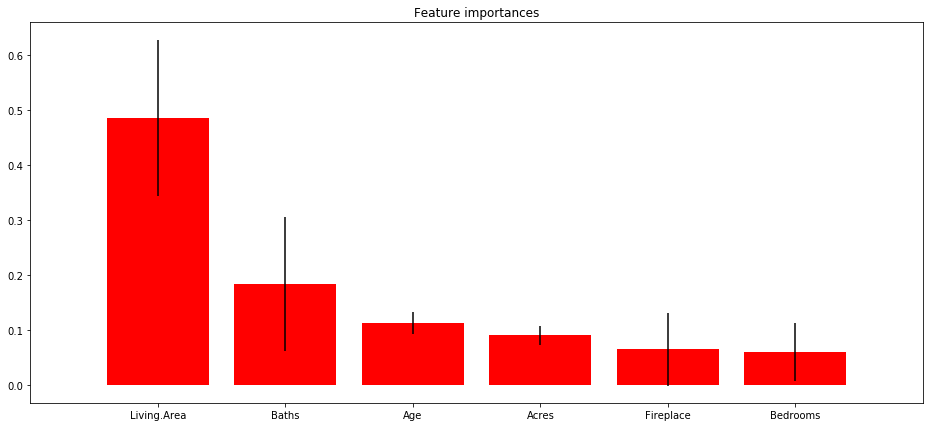

In [16]:
def print_and_plot_feature_importance(X, regr, feature_names):
    importances = regr.feature_importances_

    std = np.std([tree.feature_importances_ for tree in regr.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature in order of importance
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. %s (feature %d), Importance: %f" % (f + 1, feature_names[indices[f]], indices[f],
                                                       importances[indices[f]]))

    # Plot the feature importances
    plt.figure(figsize=(16, 7))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), feature_names[indices])
    plt.xlim([-1, X.shape[1]])
    plt.show()
    
print_and_plot_feature_importance(X_train, regr_et, feature_names)

In [17]:
calculate_R2(X_test, y_test, regr_et)

R-sqaured value: 0.675 



## Boston House Prices

Import and load the Boston dataset.

In [18]:
from sklearn.datasets import load_boston
boston = load_boston()

The Boston dataset contains data for the house prices around the area of Boston as a target variable and different features that affect house prices, such as the crime rate, the average number of rooms, and so on. There are 506 entries in the dataset, each with 13 features.

### Description of the Data Set

A description of the dataset is provided and is useful to have a quick look at to get an idea of the set.

In [19]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Working with the Dataset:

The feature names are accessed through boston.feature_names, the feature values are accessed through boston.data, and the target values are accessed through boston.target

## Tasks

### Task 1a - Preprocessing

Split the data into a training set and a testing set and normalise both sets.

In [20]:
boston_train, boston_test, target_train, target_test = train_test_split(boston.data, boston.target,
                                                                        test_size=0.25, random_state=33)

X_B_train, y_B_train = normalise(boston_train, target_train)
X_B_test, y_B_test = normalise(boston_test, target_test)

### Task 1b - Plotting Features

Plot some of the features against the target individually to get an idea of their behaviour. Remember to use scatter plots for the data points.

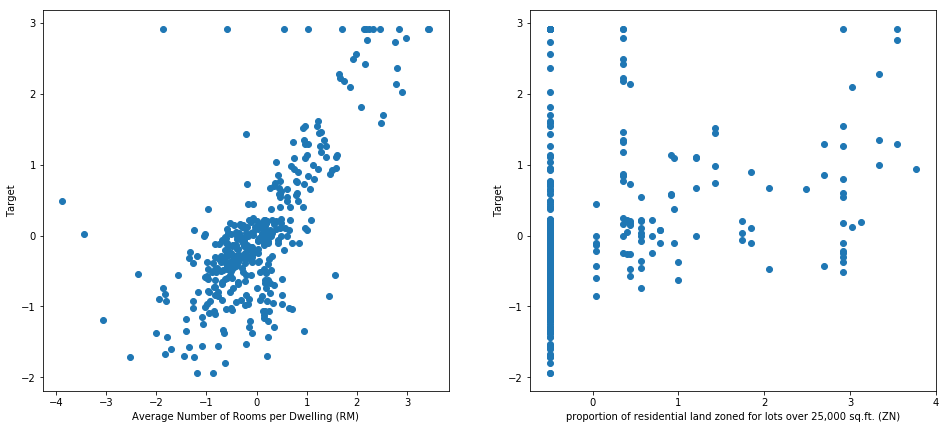

In [21]:
fig, ((ax1), (ax2)) = plt.subplots(1, 2)

ax1.scatter(X_B_train[:, 5], y_B_train)
ax1.set_xlabel("Average Number of Rooms per Dwelling ({})".format(boston.feature_names[5]))
ax1.set_ylabel("Target")
                
ax2.scatter(X_B_train[:, 1], y_B_train)
ax2.set_xlabel("proportion of residential land zoned for lots over 25,000 sq.ft. ({})".format(boston.feature_names[1]))
ax2.set_ylabel("Target")

fig.set_figheight(7)
fig.set_figwidth(16)
plt.show()

### Task 1c - Linear Regression Model

Try to make a simple linear regression model for one of the features. Remeber to reshape the feature values with ".reshape(-1, 1)" as it will be a 1D slice otherwise.

Use the model to predict the target values and plot it ontop of the scatter plot to see how it looks.

In [22]:
regr_B_lin = linear_model.LinearRegression()
regr_B_lin.fit(X_B_train[:, 5].reshape(-1, 1), y_B_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
target_prediction = regr_B_lin.predict(X_B_train[:, 5].reshape(-1, 1))

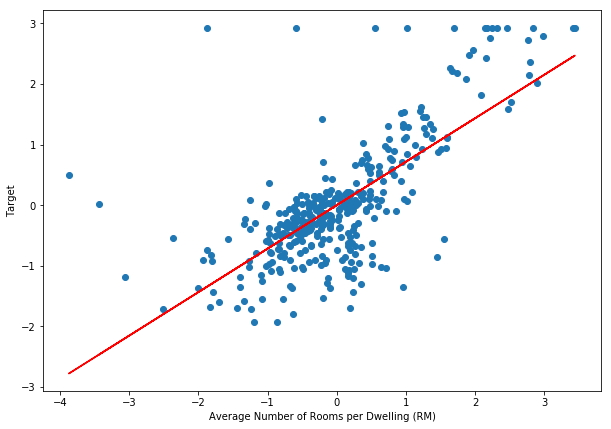

In [24]:
fig, (ax1) = plt.subplots(1, 1)

ax1.scatter(X_B_train[:, 5], y_B_train)
ax1.plot(X_B_train[:, 5], target_prediction, color='red')
ax1.set_xlabel("Average Number of Rooms per Dwelling ({})".format(boston.feature_names[5]))
ax1.set_ylabel("Target")

fig.set_figheight(7)
fig.set_figwidth(10)
plt.show()

### Task 1d - R-Squared Value

Calculate the R-squared value for this simple linear model, what do they indicate?

In [25]:
print("R-sqaured value for training set:",regr_B_lin.score(X_B_train[:, 5].reshape(-1, 1), y_B_train))
print("R-sqaured value for testing set:",regr_B_lin.score(X_B_test[:, 5].reshape(-1, 1), y_B_test))

R-sqaured value for training set: 0.514763351163
R-sqaured value for testing set: 0.383769418876


### Task 2a - Linear SGD Model

Create a linear model for all the features of the dataset using a SGD Regressor model and the data that you have already preprocessed.

In [26]:
regr_B_sgd = linear_model.SGDRegressor(loss='squared_loss', random_state=0)
train_and_evaluate(regr_B_sgd, X_B_train, y_B_train)

R-sqaured value for training set: 0.745075858841


### Task 2b - R-Squared Value

Calculate the R-squared value of this model on the testing set and compare it to that of the training set. Does this show any underfitting or overfitting effects?

In [27]:
print("R-sqaured value for training set:",regr_B_sgd.score(X_B_train, y_B_train))
print("R-sqaured value for testing set:",regr_B_sgd.score(X_B_test, y_B_test))

R-sqaured value for training set: 0.745075858841
R-sqaured value for testing set: 0.656227486053


### Task 3a - Extra Trees Regressor Model

Use the data that you previously split and normalised to make an Extra Trees model for the dataset.

In [28]:
regr_B_et=ensemble.ExtraTreesRegressor(n_estimators=100, random_state=0)
train_and_evaluate(regr_B_et, X_B_train, y_B_train)

R-sqaured value for training set: 1.0


### Task 3b - Feature Importance

Determine the feature importances and plot them on a bar chart with their standard deviations to show their respecitve errors.

Feature ranking:
1. RM (feature 5), Importance: 0.365538
2. LSTAT (feature 12), Importance: 0.350291
3. PTRATIO (feature 10), Importance: 0.052144
4. NOX (feature 4), Importance: 0.035499
5. TAX (feature 9), Importance: 0.035265
6. INDUS (feature 2), Importance: 0.031711
7. CRIM (feature 0), Importance: 0.029485
8. DIS (feature 7), Importance: 0.026495
9. CHAS (feature 3), Importance: 0.018437
10. AGE (feature 6), Importance: 0.017948
11. RAD (feature 8), Importance: 0.015073
12. B (feature 11), Importance: 0.014746
13. ZN (feature 1), Importance: 0.007368


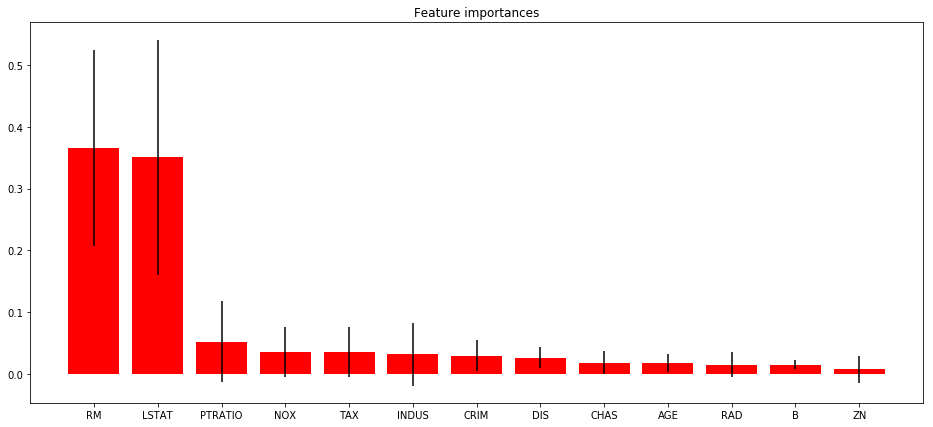

In [29]:
print_and_plot_feature_importance(X_B_train, regr_B_et, boston.feature_names)

### Task 3c - R-Squared Value

Calculate the R-squared value of the Extra Tree model using the testing dataset and compare it to that of the training set and the R-squared value from the SGD model. How do the two models compare?

In [30]:
calculate_R2(X_B_test, y_B_test, regr_B_et)

R-sqaured value: 0.768 



## Further Tasks

Make a new Extra Tree model like that in Task 3 and vary the number of trees, documenting the R-squared values and observing how the feature importances change. Plot the R-squared values against the number of trees to see if there's a trend in how the R-squared value changes.

Use the feature importances from Task 2 to select and remove features that you deem to not be important enough, while trying to avoid underfitting and overfitting. Make another Extra Tree model using only the remaining features and compare R-squared values to the Extra Tree model in Task 2.

Look up what k-fold cross validation is and implement a k-fold cross validation for k=5 folds. In the same style as the R-squared values, implement a score for the kfold values. (hint: scikit-learn has a kfold module.)

## Further Extra Tasks (Seriously, you can take a brake already... )

Implement a Random Tree Regressor model for the full set of features in the Boston dataset.

Vary the numbers of trees and compare the R-squared values, feature importance values, and computational runtime with that of the Extra Tree model containing the same features. How do the two compare?

Do the same but using the optimal feature selection that you determined before.

Now do the same but for the Saratoga Houses dataset.